In [1]:
import pandas as pd
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt

In [2]:
# Load astronomy data
data = pd.read_csv('../../Data/DR3/espectros_normalizadosNP.csv')
data

0         1         2         3         4         5         6  \
0    1.000000  0.963275  0.903244  0.858556  0.853516  0.869289  0.885497   
1    1.000000  0.771788  0.677324  0.593260  0.529016  0.517378  0.542013   
2    0.942982  1.000000  0.994795  0.939529  0.907774  0.907365  0.906004   
3    0.999049  1.000000  0.989950  0.970693  0.954327  0.926094  0.895425   
4    1.000000  0.959666  0.944849  0.850314  0.782926  0.795160  0.811005   
..        ...       ...       ...       ...       ...       ...       ...   
418  1.000000  0.793286  0.736600  0.642706  0.564153  0.577290  0.629768   
419  0.690252  0.627470  0.624956  0.643108  0.640668  0.604647  0.563618   
420  0.749535  0.907509  1.000000  0.919852  0.774177  0.722561  0.803956   
421  1.000000  0.859806  0.781651  0.768437  0.766682  0.734606  0.697106   
422  1.000000  0.985565  0.932639  0.863997  0.848164  0.894097  0.937643   

            7         8         9  ...       334       335       336  \
0    0.875889  0.862596  0.855179  ...  0.030628  0.027760  0.023020   
1    0.548153  0.548507  0.572690  ...  0.040768  0.040706  0.039856   
2    0.869911  0.841486  0.845002  ...  0.015277  0.014148  0.013310   
3    0.874978  0.884339  0.876736  ...  0.021012  0.021231  0.020369   
4    0.753086  0.709586  0.752360  ...  0.043495  0.043723  0.043515   
..        ...       ...       ...  ...       ...       ...       ...   
418  0.616867  0.586808  0.631431  ...  0.043914  0.043939  0.043193   
419  0.538220  0.538581  0.534361  ...  0.017734  0.015113  0.011871   
420  0.865523  0.800265  0.704964  ...  0.021203  0.009092  0.034128   
421  0.679657  0.697678  0.728420  ...  0.001360  0.000000  0.001476   
422  0.895210  0.821363  0.820764  ...  0.025460  0.028589  0.031182   

          337       338       339       340       341       342  id  
0    0.017343  0.010740  0.003501  0.010620  0.004592  0.000000   2  
1    0.039915  0.041191  0.043393  0.049142  0.056228  0.068138   2  
2    0.013390  0.014468  0.016314  0.019670  0.023328  0.028270   2  
3    0.019049  0.017172  0.014540  0.012097  0.009416  0.007532   2  
4    0.044613  0.047198  0.050640  0.057615  0.065128  0.076822   2  
..        ...       ...       ...       ...       ...       ...  ..  
418  0.043516  0.045236  0.047997  0.054642  0.062641  0.075786   2  
419  0.008784  0.006130  0.004269  0.003894  0.005141  0.008529   2  
420  0.021466  0.010451  0.003308  0.000000  0.003766  0.013197   2  
421  0.006973  0.016963  0.031134  0.050534  0.071787  0.097027   2  
422  0.033739  0.035692  0.035853  0.035538  0.032508  0.028768   2  

[423 rows x 344 columns]

In [4]:
# Preprocess the data by standardizing it
data_standardized = (data - data.mean()) / data.std()

In [5]:
data_standardized.drop(columns='id', inplace=True)

C:\Users\joshp\AppData\Local\Temp\ipykernel_34200\3758714374.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


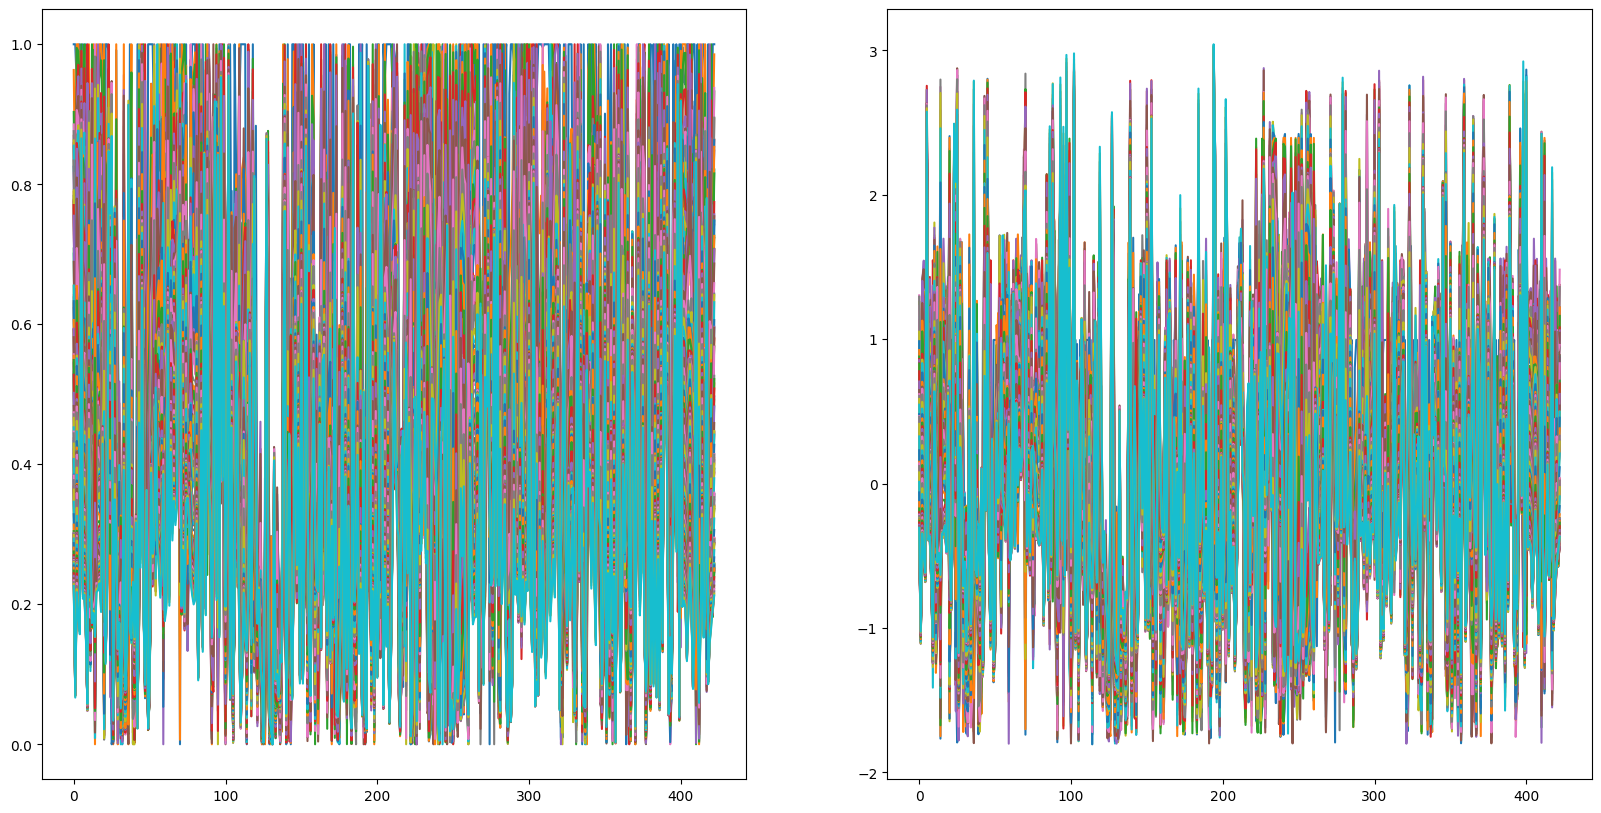

In [9]:
fig = plt.figure(figsize=(20,10))
ax =fig.subplots(1,2)
ax[0].plot(data.iloc[0:423,:100])
ax[1].plot(data_standardized.iloc[0:425,:100])
fig.show()

In [19]:
# Perform LLE on the data
lle = LocallyLinearEmbedding(n_components=15, n_neighbors=70)
lle_transformed = lle.fit_transform(data_standardized)
lle_transformed_data = pd.DataFrame(lle_transformed)

In [20]:
lle_transformed_data

0         1         2         3         4         5         6   \
0   -0.014770 -0.044952 -0.035460  0.010088  0.014024 -0.008656 -0.039068   
1    0.049905 -0.023954 -0.034286  0.034193  0.045340  0.045252  0.046440   
2   -0.015629 -0.046795 -0.037434  0.001150  0.014090 -0.021673 -0.055787   
3   -0.006587 -0.046452 -0.039512  0.005434  0.024359 -0.013083 -0.060510   
4    0.013332 -0.035476 -0.035178  0.025059  0.042073  0.011506 -0.017867   
..        ...       ...       ...       ...       ...       ...       ...   
418  0.041965 -0.026507 -0.035429  0.027149  0.043301  0.031596  0.037236   
419  0.023366 -0.030503 -0.031552 -0.002859 -0.028196  0.043978  0.093461   
420  0.001546 -0.040711 -0.038045  0.010505  0.024668 -0.008098 -0.032605   
421  0.007484 -0.035386 -0.033522  0.021892  0.027565  0.004684 -0.011300   
422 -0.011898 -0.044017 -0.036750  0.008039  0.020319 -0.020430 -0.037337   

           7         8         9         10        11        12        13  \
0    0.024588  0.032178 -0.035939 -0.056042 -0.050910  0.008366  0.005880   
1   -0.034157  0.017121  0.027149  0.022684  0.018297 -0.011682 -0.015998   
2    0.000551 -0.021559 -0.042284  0.033153 -0.013943 -0.033750  0.014933   
3   -0.019005  0.005126 -0.039514 -0.015950 -0.064099 -0.046604  0.011624   
4   -0.034886  0.009020 -0.009486 -0.040426 -0.001358  0.054359 -0.002844   
..        ...       ...       ...       ...       ...       ...       ...   
418 -0.043505  0.004943  0.021807  0.007054  0.016885  0.003535 -0.013957   
419  0.022845  0.021981 -0.158898 -0.011436 -0.099594  0.026726 -0.003682   
420  0.046359  0.100680  0.087330  0.040304 -0.135290 -0.098280  0.049659   
421  0.026789  0.049515  0.047383  0.081730 -0.026905  0.011167 -0.003921   
422  0.008257  0.022499  0.005083 -0.030582 -0.013766  0.120839  0.004865   

           14  
0   -0.033800  
1    0.002110  
2   -0.053647  
3   -0.124593  
4   -0.063416  
..        ...  
418 -0.008794  
419  0.005255  
420  0.113817  
421  0.043041  
422 -0.014105  

[423 rows x 15 columns]

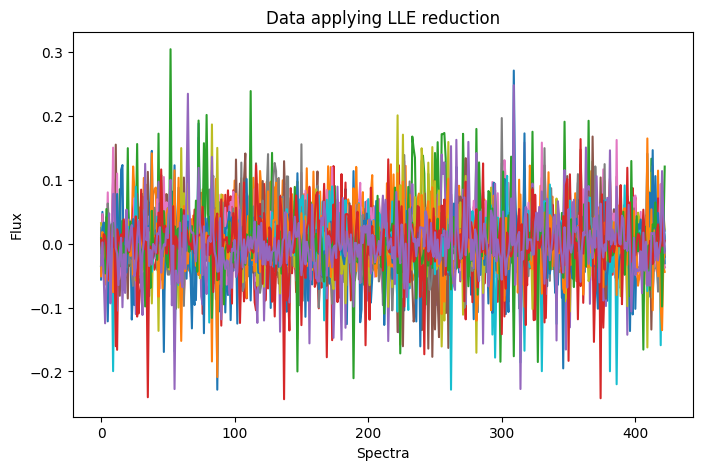

In [45]:
plt.figure(figsize=(8,5))
plt.title("Data applying LLE reduction")
plt.xlabel("Spectra")
plt.ylabel("Flux")
plt.plot(lle_transformed_data.iloc[0:423, 0:15])
plt.show()

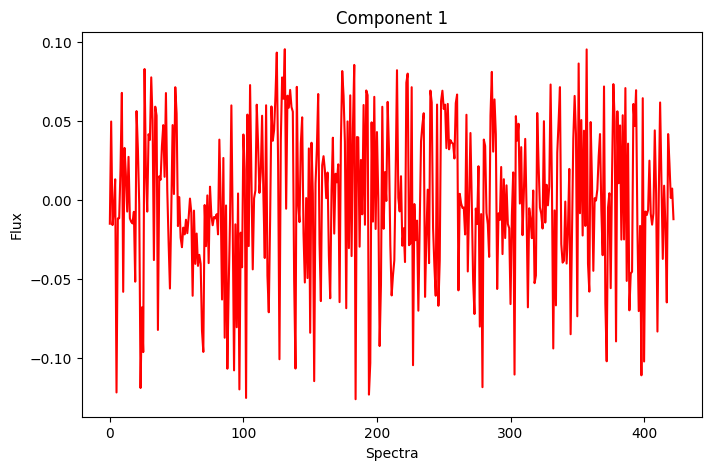

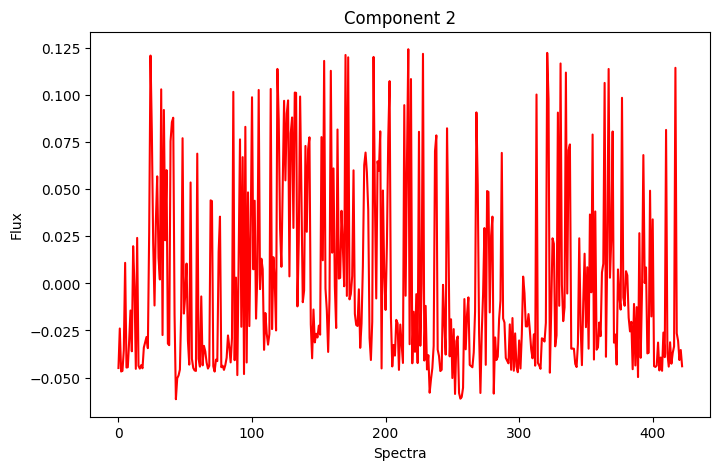

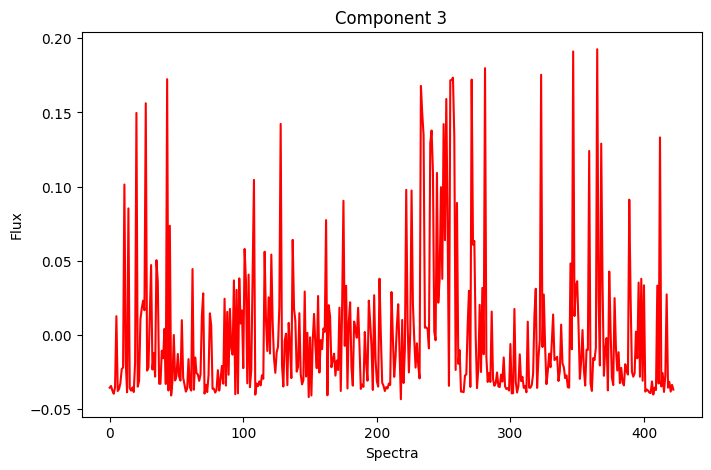

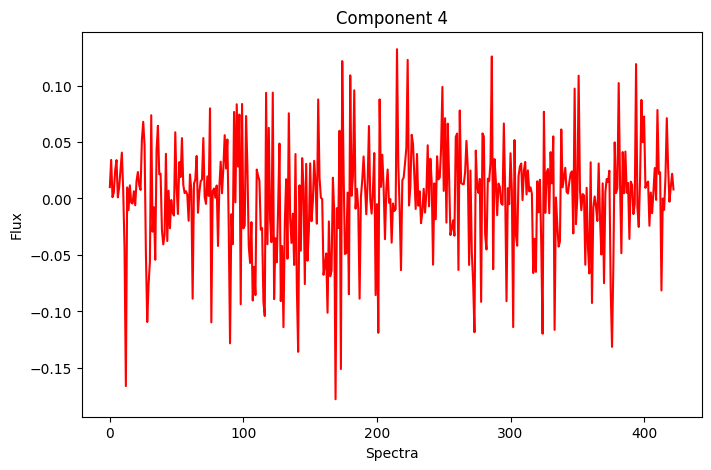

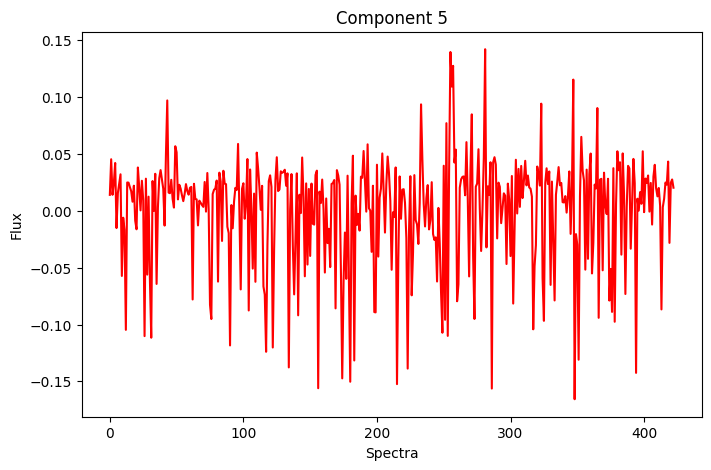

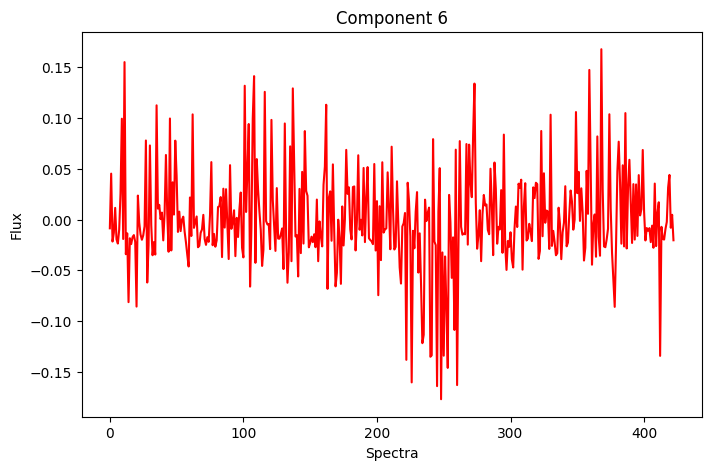

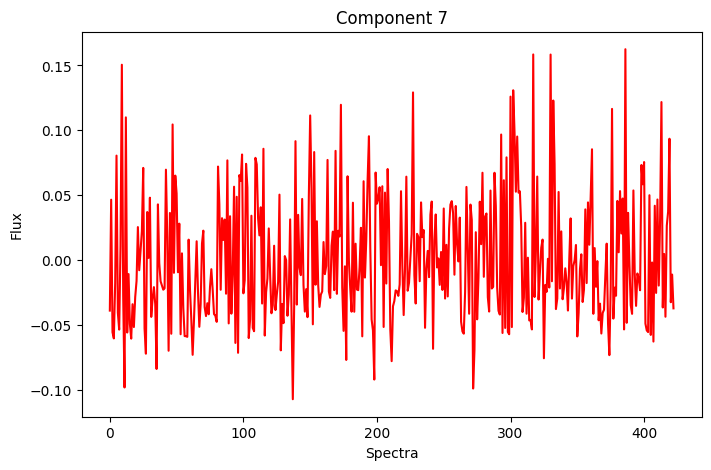

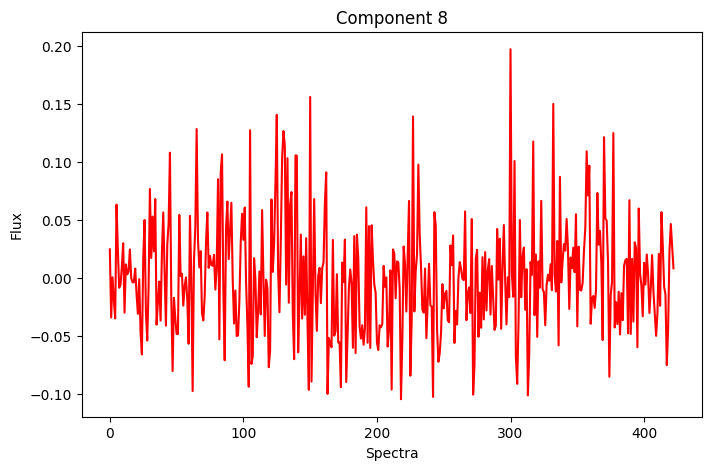

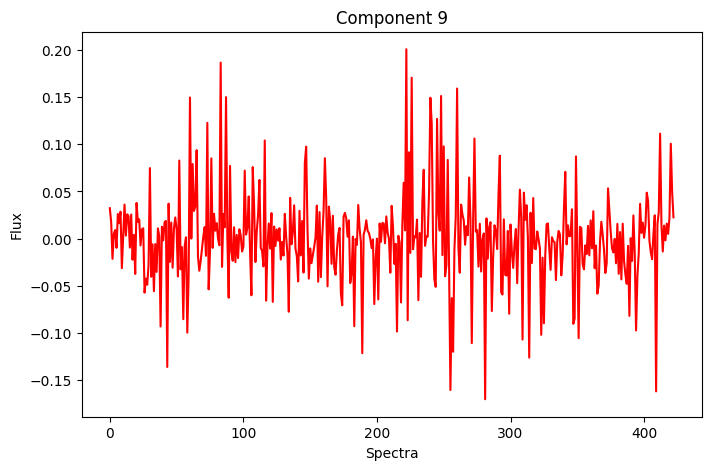

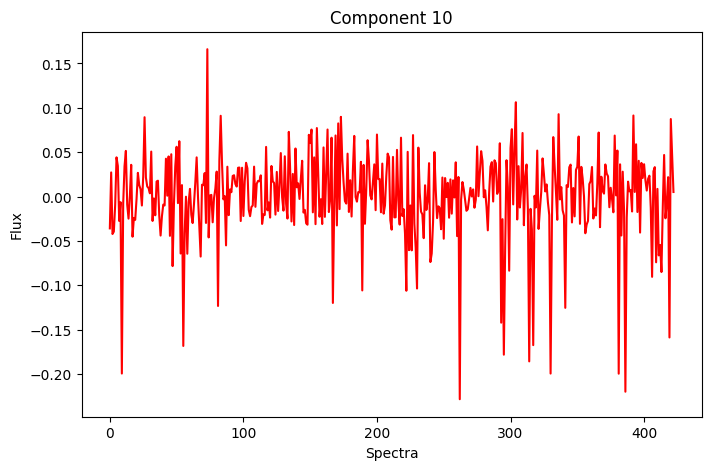

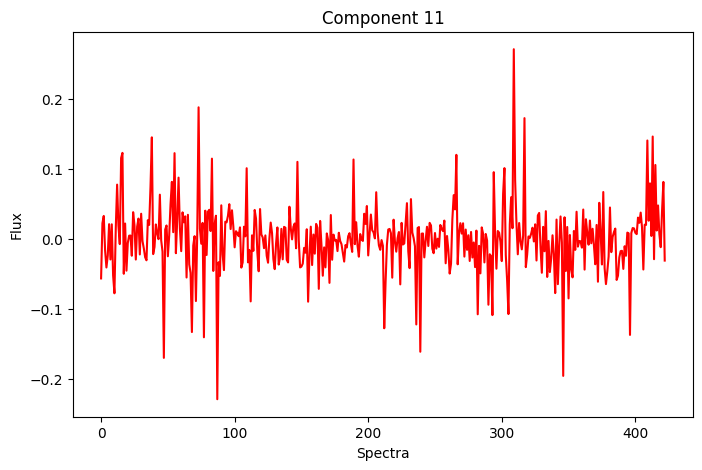

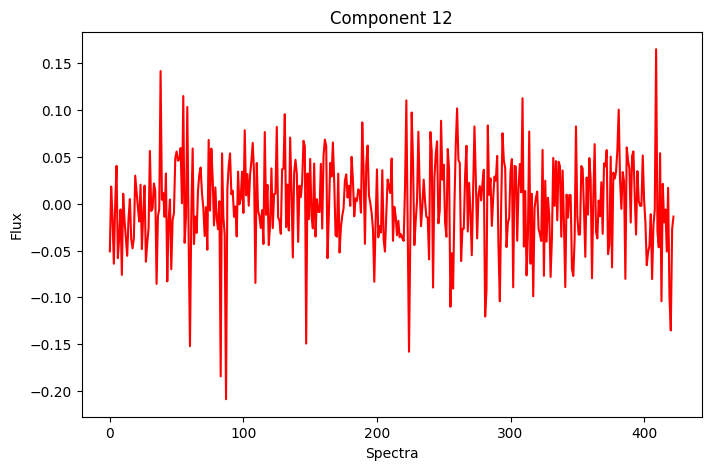

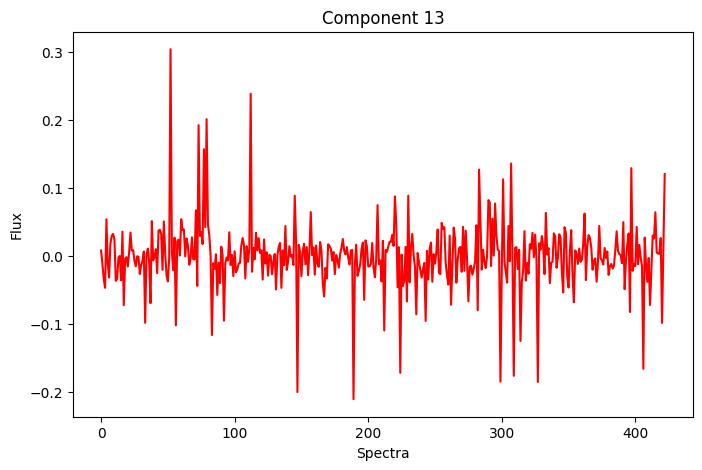

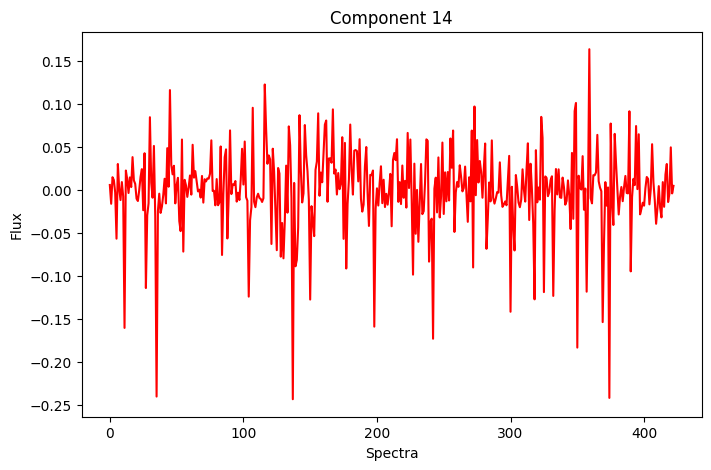

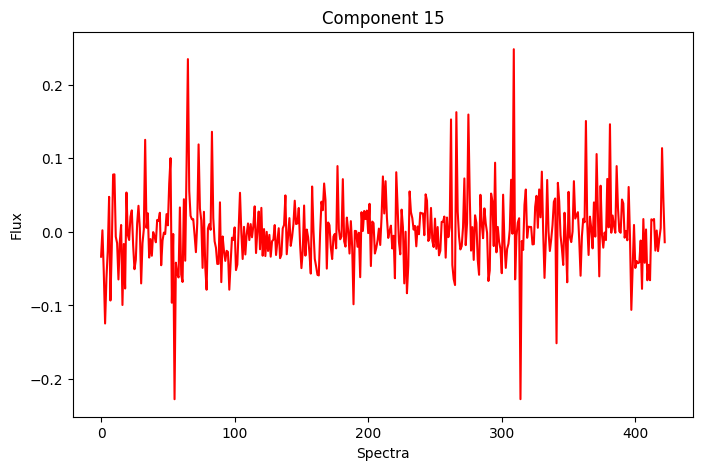

In [42]:
for i in range(0,15):
    plt.figure(figsize=(8,5))
    plt.title(f"Component {i+1}")
    plt.xlabel("Spectra")
    plt.ylabel("Flux")
    plt.plot(lle_transformed_data.iloc[0:423, i], '-',markersize=1, color = "r")
    plt.show()

In [33]:
# Perform HLLE on the data
hlle = LocallyLinearEmbedding(n_components=15, n_neighbors=140, method='hessian', eigen_solver='dense')
hlle_transformed = hlle.fit_transform(data_standardized)
hlle_transformed_data = pd.DataFrame(hlle_transformed)

In [22]:
hlle_transformed_data

0         1         2         3         4         5         6   \
0    0.029883  0.042482 -0.024820 -0.019266 -0.004436  0.015126 -0.011120   
1    0.055750 -0.014949 -0.008364 -0.046477  0.034175  0.003081  0.042655   
2    0.030845  0.043677 -0.031156 -0.014086 -0.000108  0.016344 -0.019706   
3    0.036722  0.036215 -0.033321 -0.016913  0.008880  0.022084 -0.014511   
4    0.040475  0.016338 -0.022432 -0.028921  0.025344  0.021044  0.014444   
..        ...       ...       ...       ...       ...       ...       ...   
418  0.052675 -0.007804 -0.015045 -0.039481  0.035343  0.008633  0.035126   
419  0.043456  0.010224 -0.003873 -0.026183 -0.014513 -0.028056  0.013135   
420  0.038483  0.028540 -0.023817 -0.022829  0.002594  0.006500 -0.010355   
421  0.037157  0.021604 -0.013985 -0.031921  0.005280  0.006046  0.007443   
422  0.031184  0.039856 -0.028558 -0.017661  0.002572  0.016841 -0.010311   

           7         8         9         10        11        12        13  \
0    0.026037  0.004046 -0.027066 -0.002201  0.011427  0.004432 -0.036500   
1   -0.008447 -0.020993 -0.024838  0.004413 -0.019015 -0.000422  0.015890   
2    0.023288  0.010144 -0.014423  0.002358  0.009829 -0.004693 -0.022924   
3    0.027348  0.013471 -0.025001  0.001114  0.008897  0.000556 -0.036446   
4    0.019713  0.013694 -0.017999  0.004079 -0.001550  0.010068 -0.023184   
..        ...       ...       ...       ...       ...       ...       ...   
418 -0.005108 -0.014390 -0.017618  0.004930 -0.015863  0.002900  0.008675   
419 -0.045496 -0.043269  0.047916  0.013070  0.013763  0.060741 -0.025986   
420  0.018728  0.002555 -0.021658  0.003972  0.006278 -0.019273 -0.006076   
421  0.015376 -0.007630 -0.028404  0.002286 -0.006141 -0.017964  0.005973   
422  0.022834  0.008700 -0.022449  0.001815  0.004117 -0.006213 -0.023088   

           14  
0    0.003235  
1   -0.030400  
2    0.015881  
3    0.011848  
4    0.001121  
..        ...  
418 -0.025151  
419 -0.030133  
420  0.003991  
421 -0.000445  
422  0.006819  

[423 rows x 15 columns]

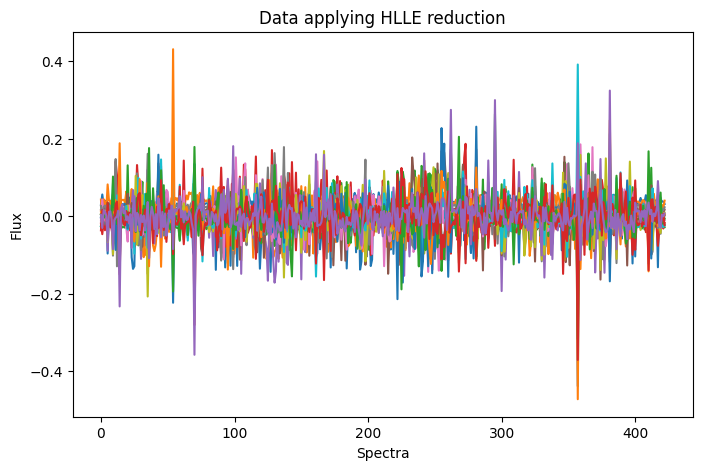

In [47]:
plt.figure(figsize=(8,5))
plt.title("Data applying HLLE reduction")
plt.xlabel("Spectra")
plt.ylabel("Flux")
plt.plot(hlle_transformed_data.iloc[0:423, 0:15])
plt.show()

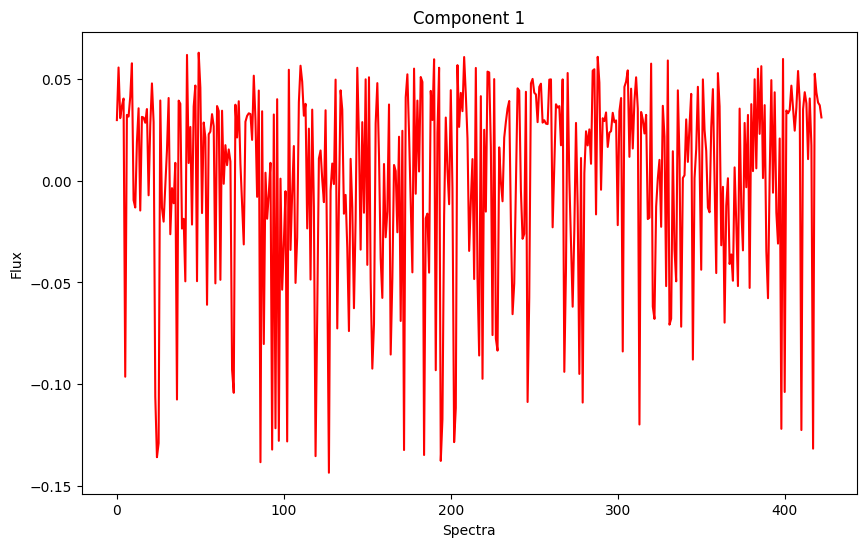

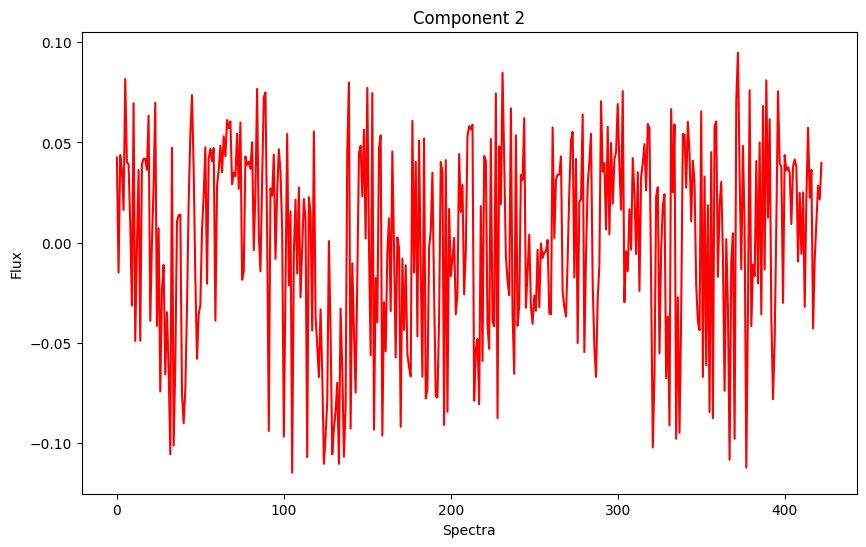

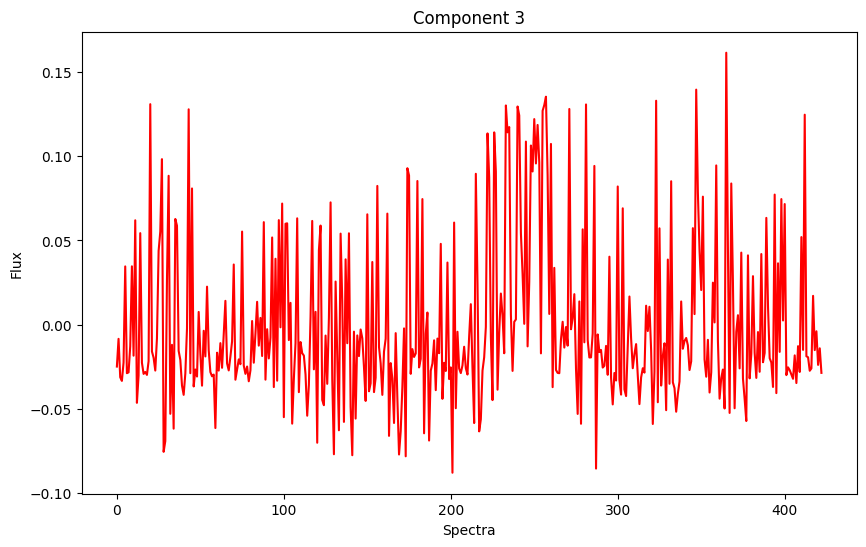

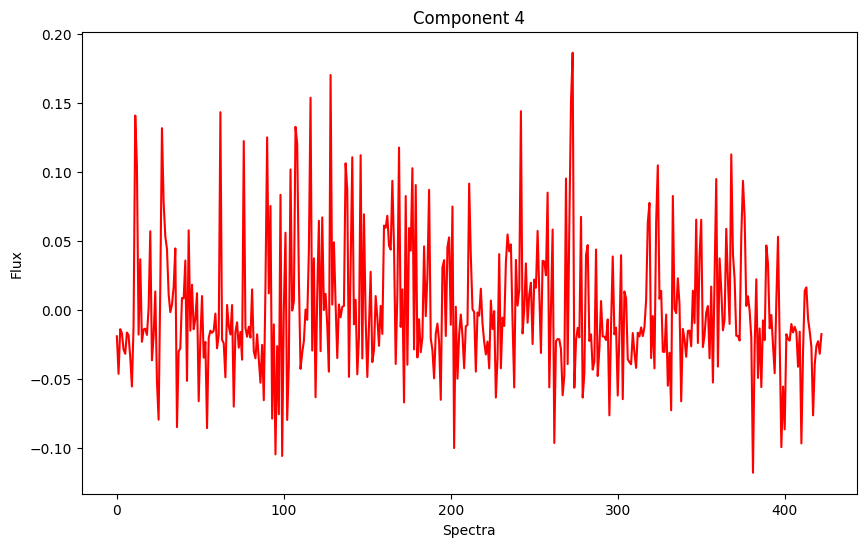

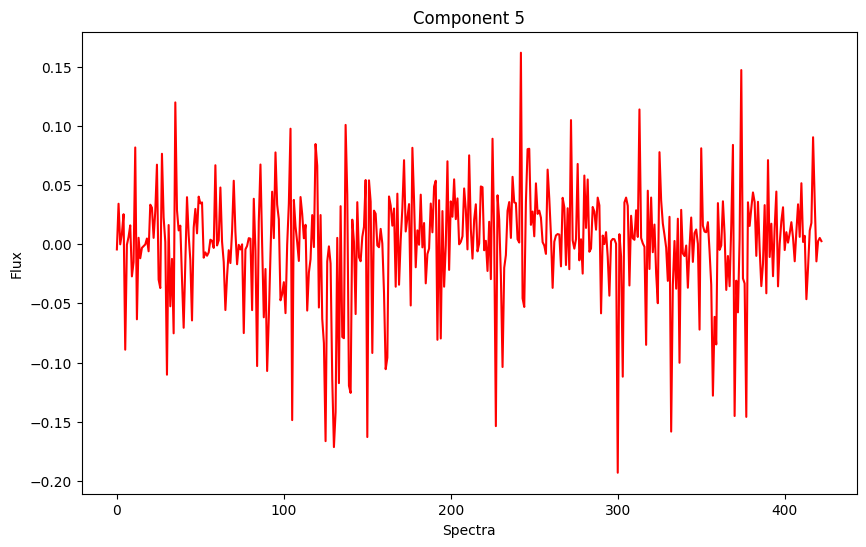

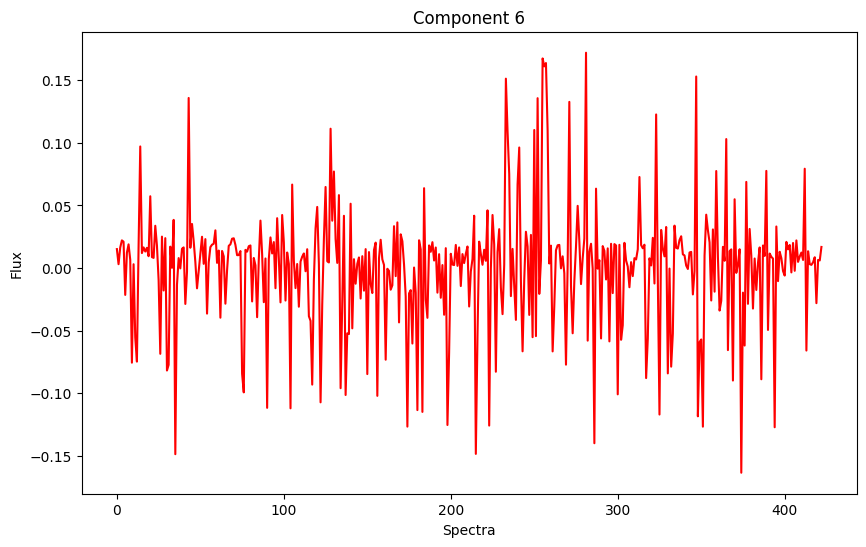

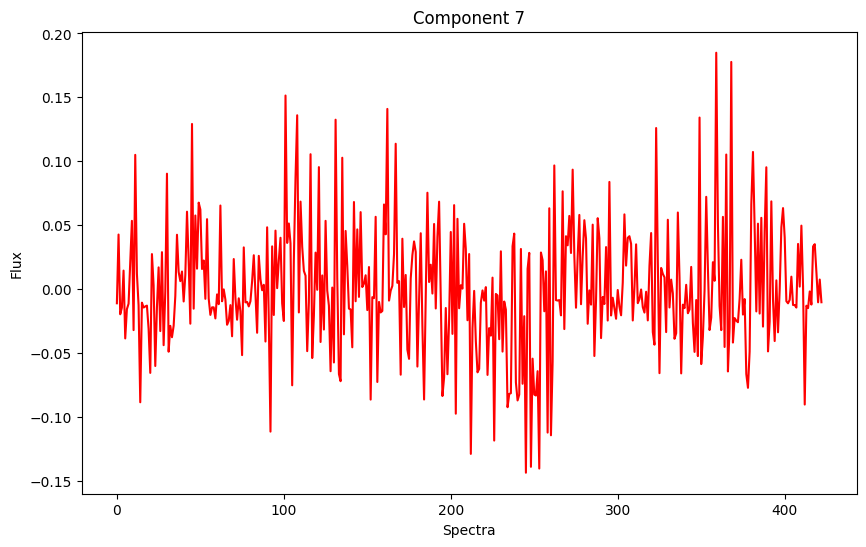

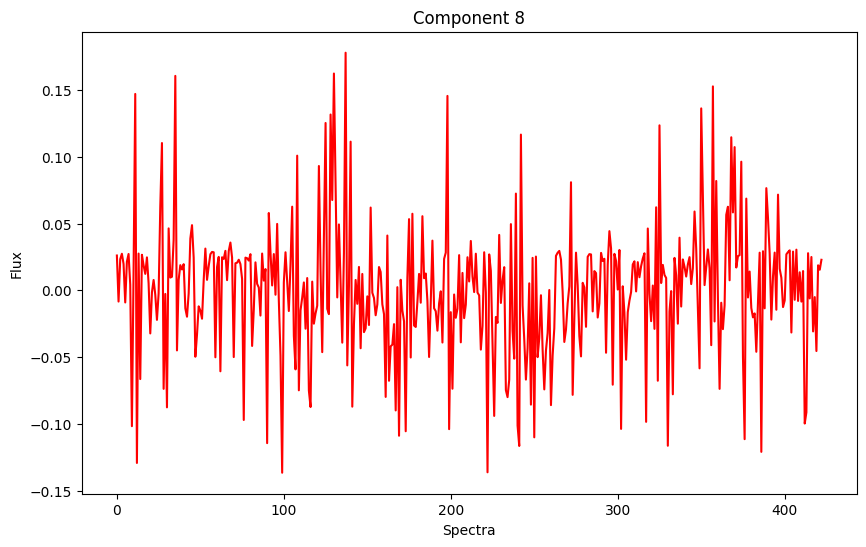

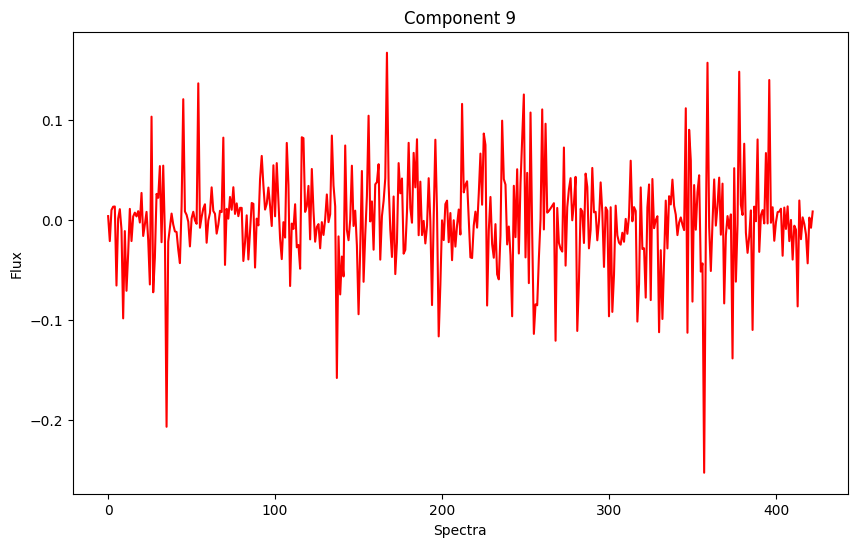

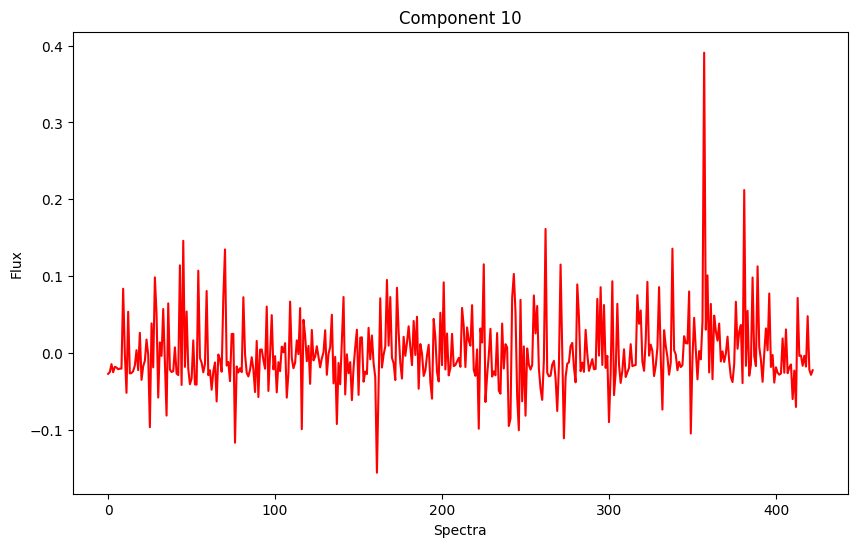

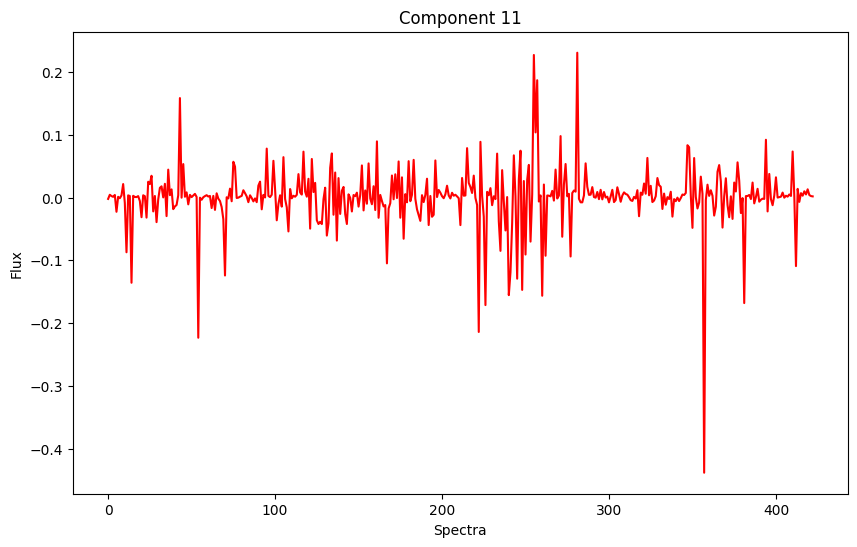

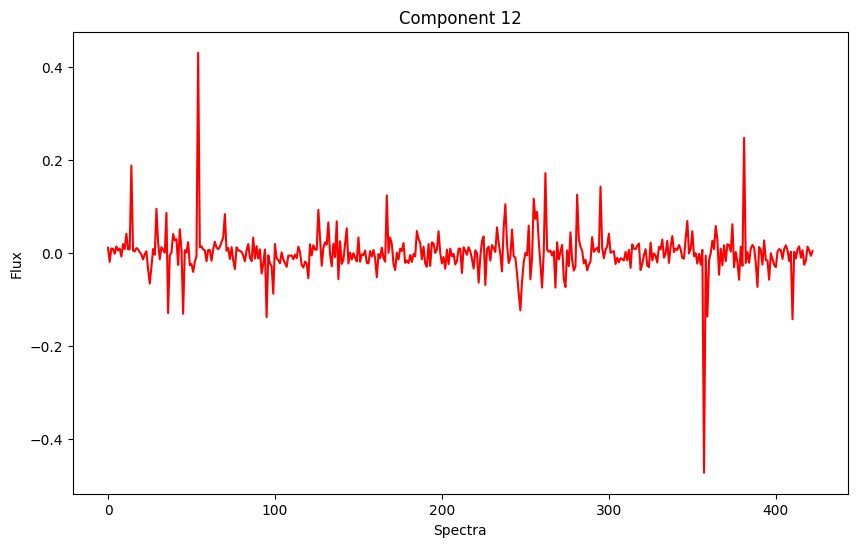

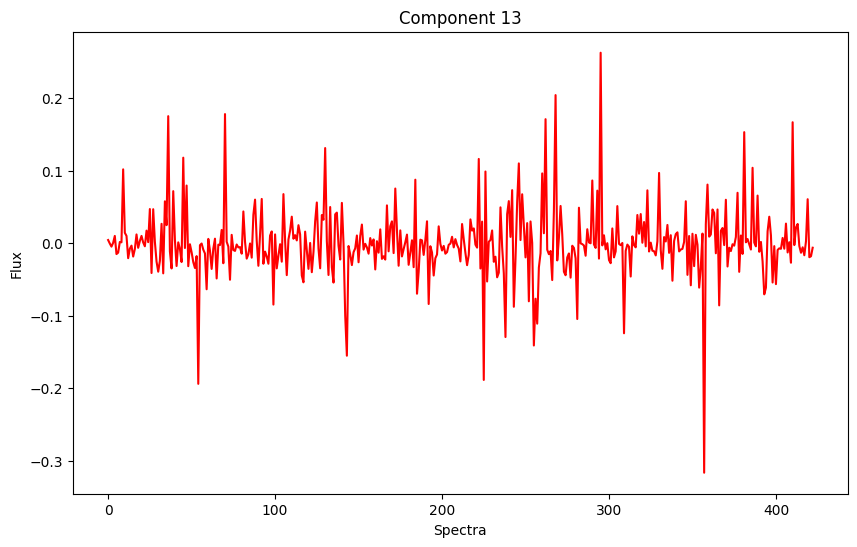

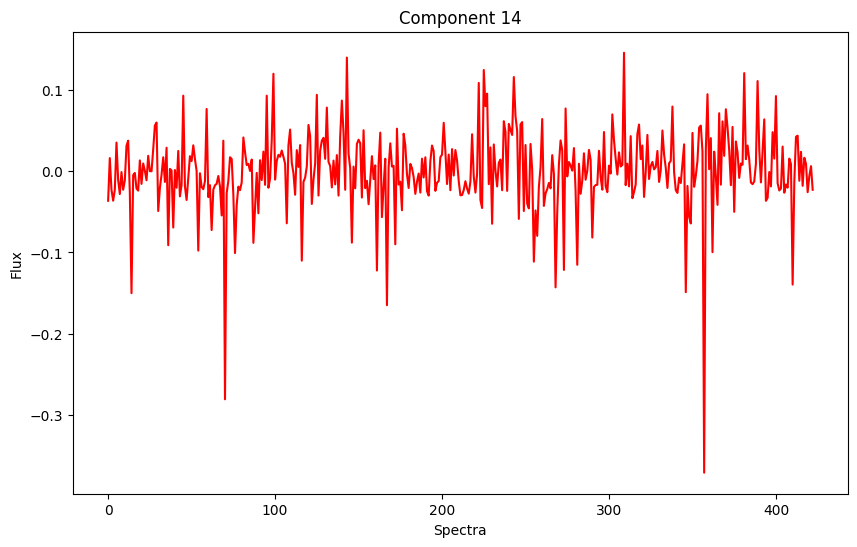

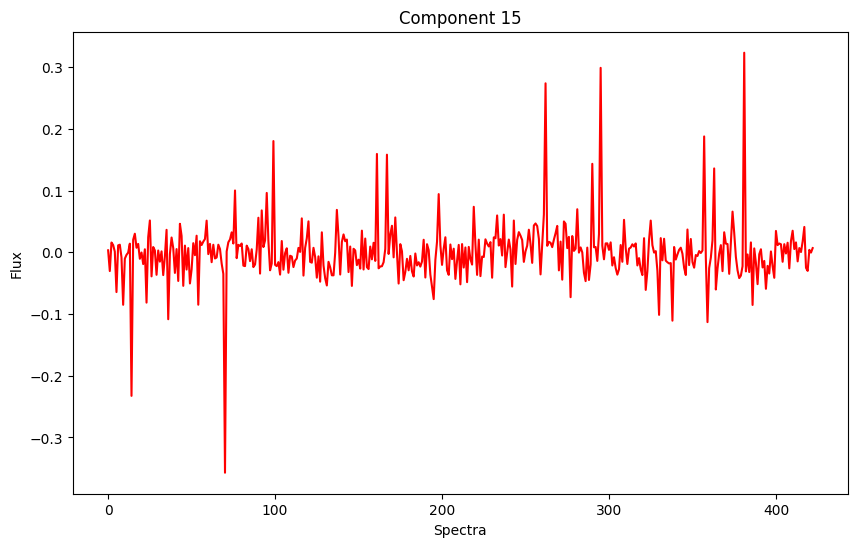

In [49]:
for i in range(0,15):
    plt.figure(figsize=(10,6))
    plt.title(f"Component {i+1}")
    plt.xlabel("Spectra")
    plt.ylabel("Flux")
    plt.plot(hlle_transformed_data.iloc[0:423, i], '-',markersize=1, color = "r")
    plt.show()

In [50]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components=15)
pca_transformed = pca_data.fit_transform(data_standardized)
pca_transformed_data = pd.DataFrame(pca_transformed)

In [51]:
pca_transformed_data

0         1         2         3         4         5         6   \
0   -11.299453 -5.950065 -2.918388 -0.280059 -0.940756 -0.240482 -0.209909   
1   -15.459749  4.763621 -0.918693 -2.195967  0.815524 -0.341860  1.395674   
2   -11.604406 -6.025168 -3.254896 -0.081485 -0.815973 -0.566210 -0.372417   
3   -12.854092 -4.476437 -3.333860 -0.302367 -0.581546 -0.816310 -0.296476   
4   -12.821580 -1.116742 -2.160901 -1.100933  0.150631 -0.651407  0.710067   
..         ...       ...       ...       ...       ...       ...       ...   
418 -14.962295  3.466694 -1.344567 -1.845706  0.772254 -0.581388  1.257973   
419 -13.425537  0.019699 -1.036434 -1.134582 -0.052192  0.738986  0.555382   
420 -12.941995 -3.159142 -2.688453 -0.657878 -0.572327 -0.407705 -0.187197   
421 -12.193583 -2.190606 -1.910991 -1.131311 -0.414956 -0.088957  0.296637   
422 -11.487217 -5.406001 -3.027349 -0.300166 -0.692074 -0.479382 -0.156038   

           7         8         9         10        11        12        13  \
0    0.710082 -0.040257  0.238962 -0.296739 -0.222255  0.349966 -0.256234   
1    0.067049  0.252543  0.472254 -0.257262 -0.257636 -0.266378  0.075825   
2    0.689987 -0.129881  0.065618 -0.237853  0.206201  0.227232  0.095440   
3    0.835634 -0.171154  0.288157 -0.327333 -0.014987  0.405756 -0.175796   
4    0.719452 -0.349796  0.053742 -0.196010 -0.144096  0.372984  0.003232   
..        ...       ...       ...       ...       ...       ...       ...   
418  0.155170  0.131271  0.310058 -0.153769 -0.243377 -0.226610  0.048630   
419 -1.300371  1.510312 -0.538723  0.328777 -0.391132  0.504843 -0.260801   
420  0.558914  0.002620  0.242529 -0.314790 -0.047142  0.121185 -0.121234   
421  0.479880  0.052238  0.458867 -0.408391 -0.092809 -0.289906 -0.004460   
422  0.720503 -0.140751  0.178113 -0.245910  0.083327  0.209140 -0.099665   

           14  
0    0.211334  
1   -0.029242  
2    0.133435  
3    0.034434  
4    0.076113  
..        ...  
418  0.117152  
419  0.454460  
420 -0.157594  
421 -0.139824  
422  0.389300  

[423 rows x 15 columns]

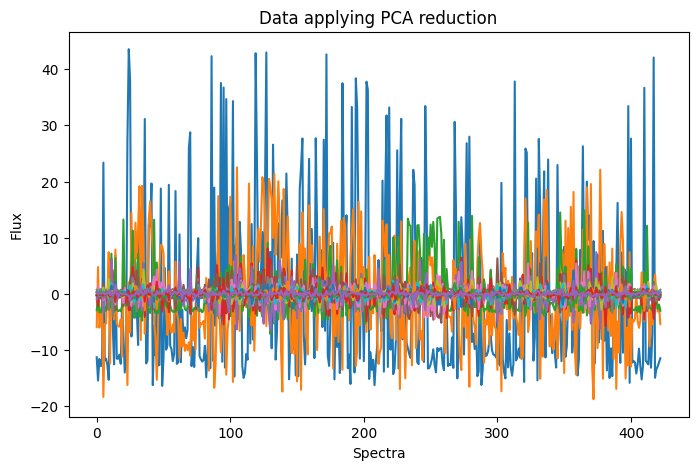

In [55]:
plt.figure(figsize=(8,5))
plt.title("Data applying PCA reduction")
plt.xlabel("Spectra")
plt.ylabel("Flux")
plt.plot(pca_transformed_data.iloc[0:423,:15])
plt.show()

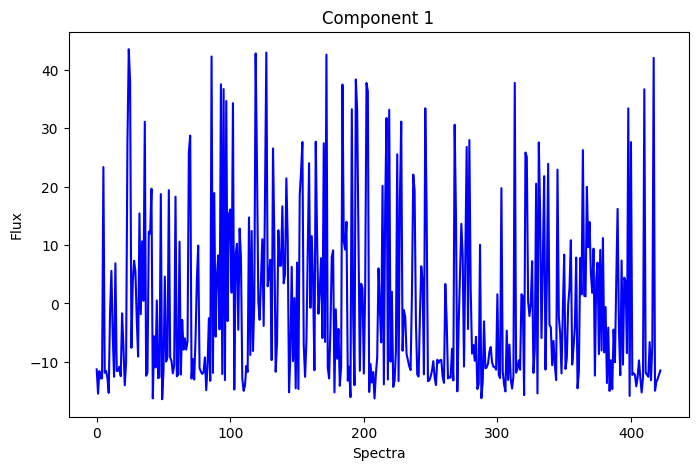

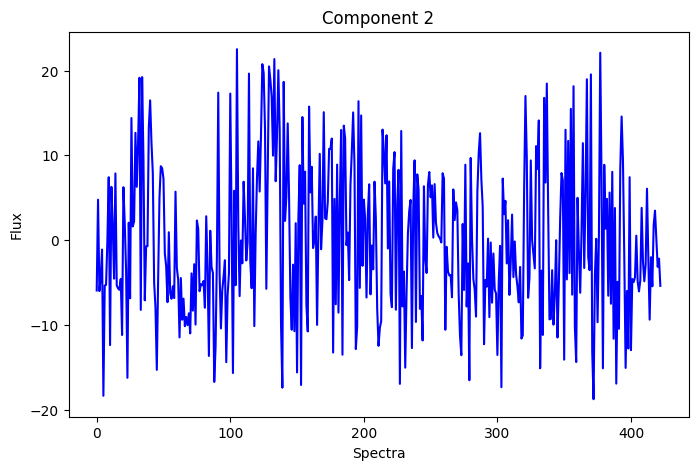

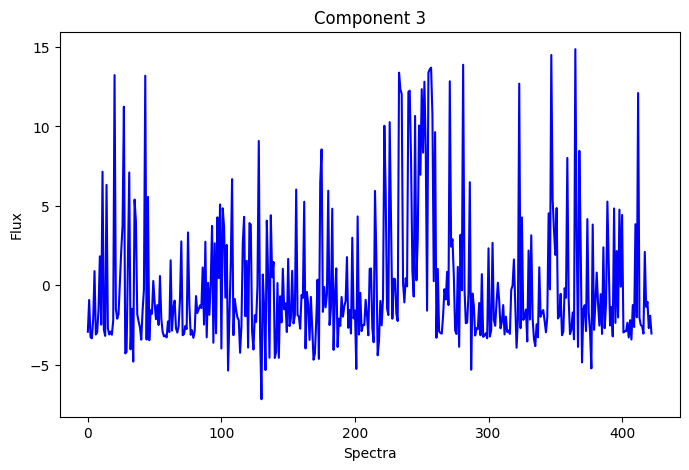

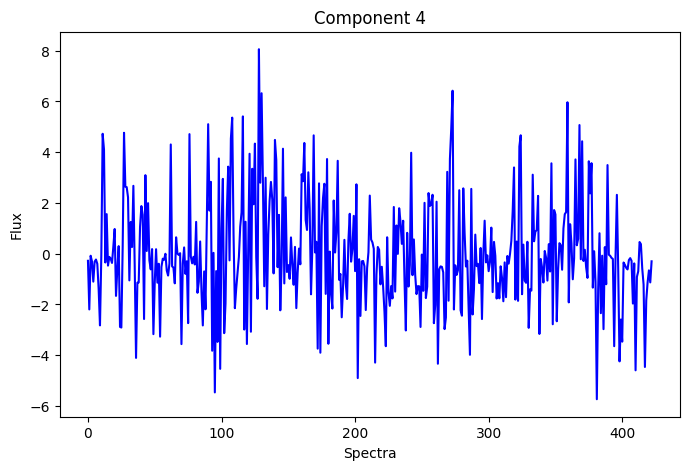

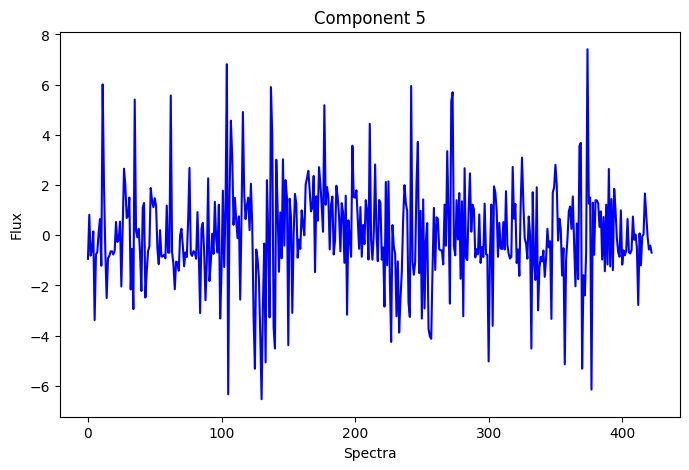

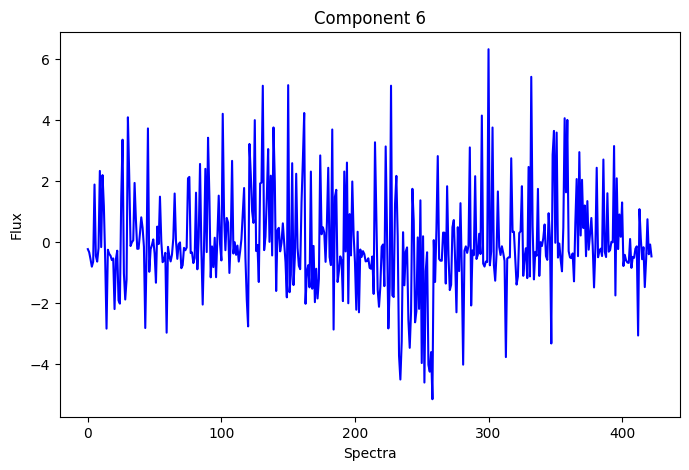

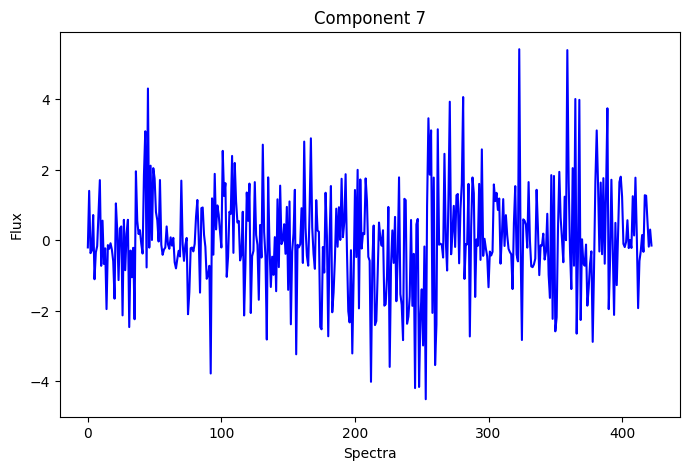

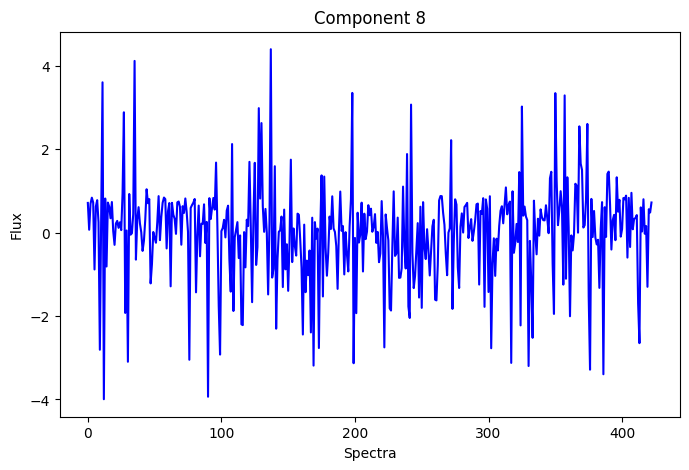

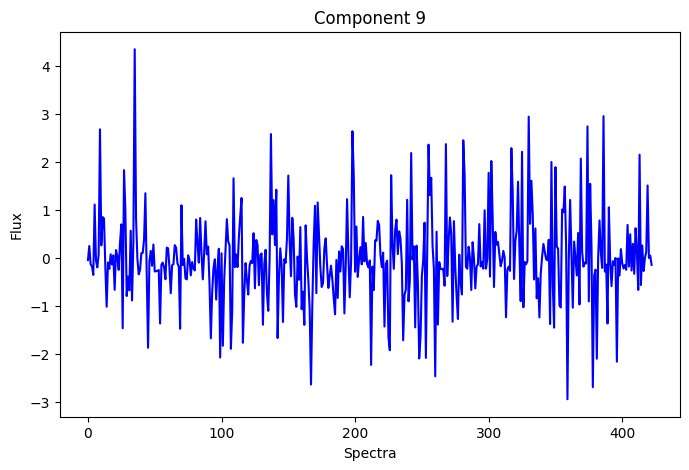

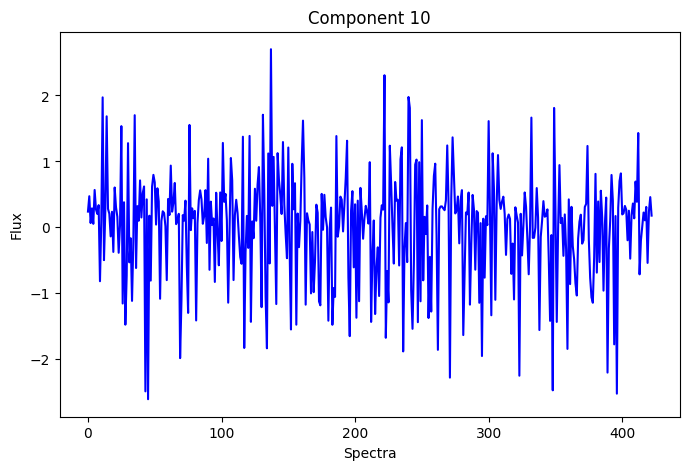

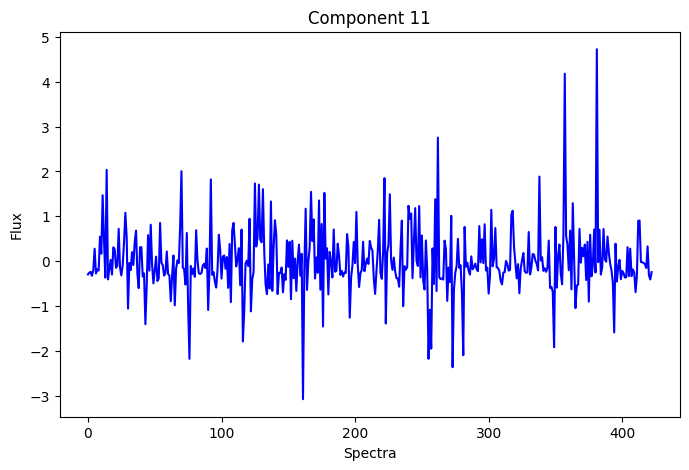

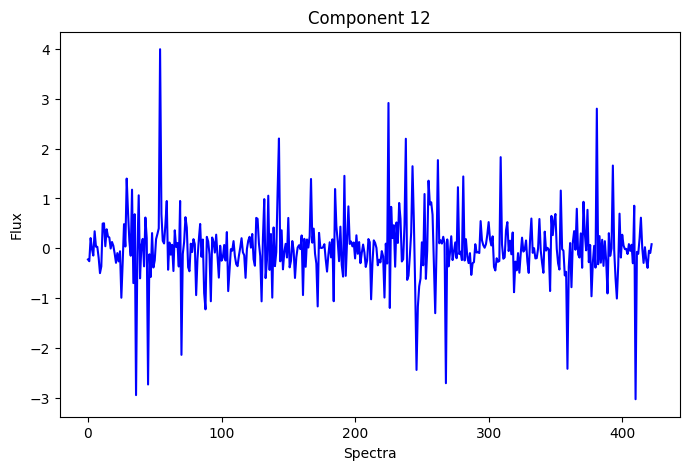

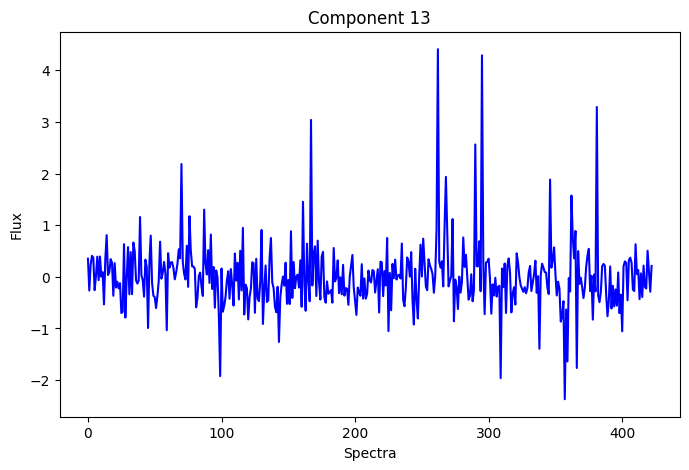

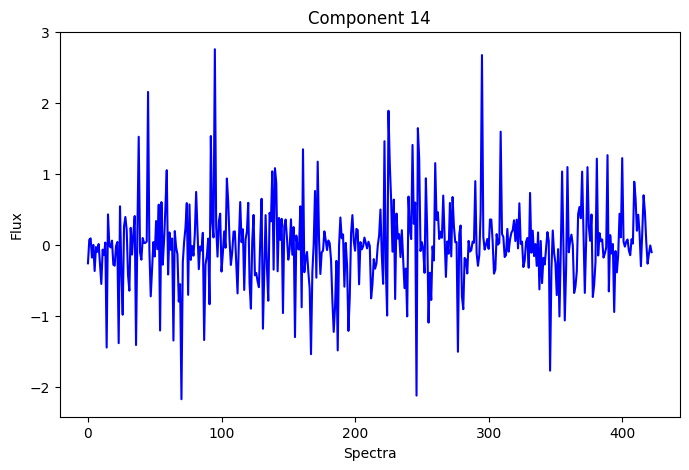

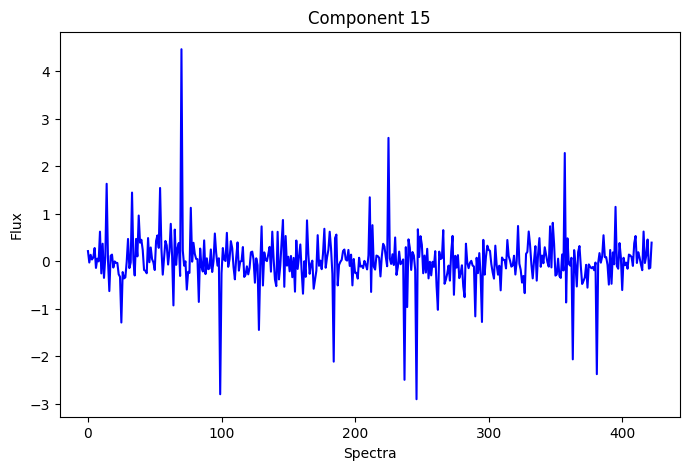

In [57]:
for i in range(0,15):
    plt.figure(figsize=(8,5))
    plt.title(f"Component {i+1}")
    plt.xlabel("Spectra")
    plt.ylabel("Flux")
    plt.plot(pca_transformed_data.iloc[0:423, i], '-',markersize=1, color = "b")
    plt.show()

In [58]:
#iteration to visualize the optimal number of components in PCA
for i in range(1,20):
  data = []
  pca = PCA(n_components=i)
  features_reduced = pca.fit_transform(data_standardized)
  print(f"n = {i}")
  print(pca.explained_variance_ratio_.sum())
  data.append(pca.explained_variance_ratio_.sum())

n = 1
0.6452129221909538
n = 2
0.8815320773267729
n = 3
0.9337504065778768
n = 4
0.9472538330130474
n = 5
0.9589664723472998
n = 6
0.9672178654352713
n = 7
0.9734361107288789
n = 8
0.9774458682410909
n = 9
0.9799600260490898
n = 10
0.9819810325156669
n = 11
0.9835393566587263
n = 12
0.9848405851959015
n = 13
0.9860471306751128
n = 14
0.9870715330985705
n = 15
0.9879647330581309
n = 16
0.9888098950193607
n = 17
0.9895309224341591
n = 18
0.99024368543961
n = 19
0.9908658597934666


C:\Users\joshp\AppData\Local\Temp\ipykernel_34200\1412236490.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


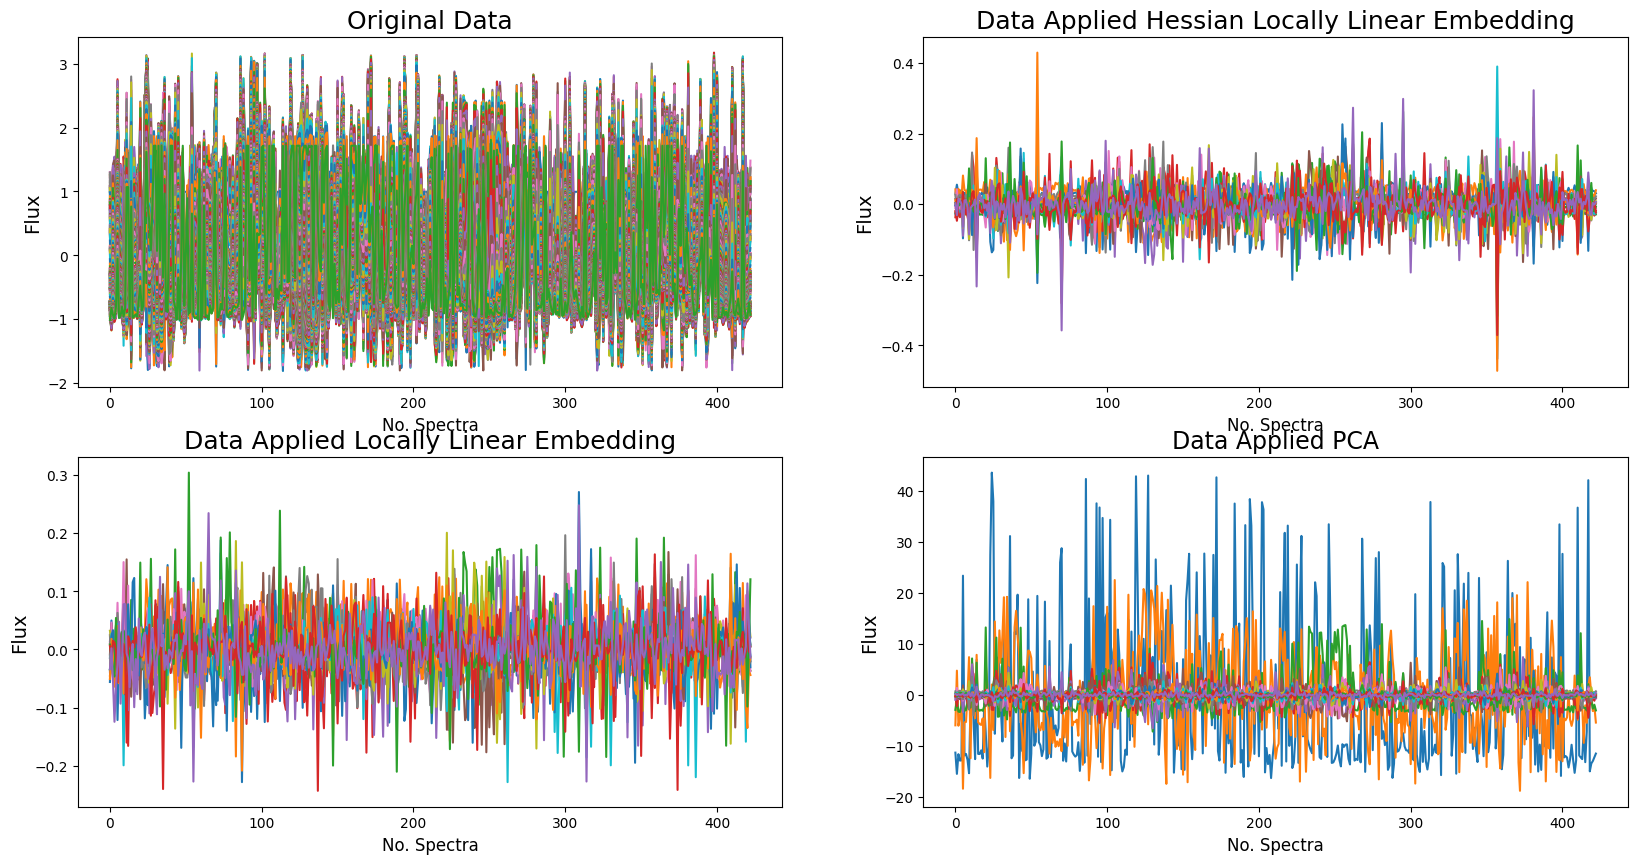

In [61]:
#comparison of original data and data applying dimensionality reduction

fig =  plt.figure(figsize=(20,10))
ax = fig.subplots(2,2)
ax[0,0].set_title("Original Data", fontsize=18)
ax[0,0].set_ylabel("Flux", fontsize=14)
ax[0,0].set_xlabel("No. Spectra", fontsize=12)
ax[0,0].plot(data_standardized)#.iloc[0:423,0:15])

ax[0,1].set_title("Data Applied Hessian Locally Linear Embedding", fontsize=18)
ax[0,1].set_ylabel("Flux", fontsize=14)
ax[0,1].set_xlabel("No. Spectra", fontsize=12)
ax[0,1].plot(hlle_transformed_data.iloc[0:423,0:15])


ax[1,0].set_title("Data Applied Locally Linear Embedding", fontsize=18)
ax[1,0].set_ylabel("Flux", fontsize=14)
ax[1,0].set_xlabel("No. Spectra", fontsize=12)
ax[1,0].plot(lle_transformed_data.iloc[0:423,0:15])

#PCA
ax[1,1].set_title("Data Applied PCA", fontsize=17)
ax[1,1].set_ylabel("Flux", fontsize=14)
ax[1,1].set_xlabel("No. Spectra", fontsize=12)
ax[1,1].plot(pca_transformed_data.iloc[0:423,0:15])

fig.show()

In [62]:
lle_transformed_data.to_csv("output/DATA_LLE_NP.csv", index=False)

In [63]:
hlle_transformed_data.to_csv("output/DATA_HESSIAN_NP.csv", index=False)

In [64]:
pca_transformed_data.to_csv("output/DATA_PCA.csv", index=False)